In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/content/weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [22]:
df.shape

(10000, 3)

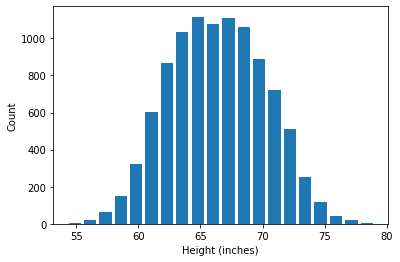

In [5]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

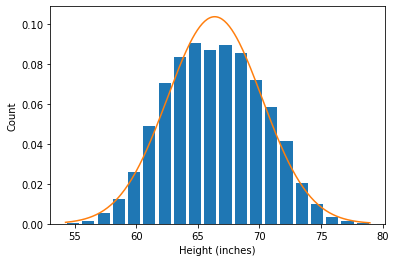

In [6]:
from scipy.stats import norm
import numpy as np
plt.hist(df.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(),df.Height.std()))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [9]:
df.Height.mean()

66.36755975482106

In [10]:
df.Height.std()

3.8475281207732324

In [13]:
max_value= df.Height.mean()+3*df.Height.std()
max_value

77.91014411714076

In [14]:
min_value= df.Height.mean()-3*df.Height.std()
min_value

54.82497539250136

In [24]:
outlier=df[(df.Height>max_value) | (df.Height<min_value)]
outlier

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [25]:
#remove outlier
remove_outlier=df[(df.Height<max_value) | (df.Height>min_value)]
remove_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [28]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
df=pd.read_csv("/content/car driving risk analysis.csv")

In [33]:
df.head()

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


In [34]:
df.isnull().sum()

speed    0
risk     0
dtype: int64

In [35]:
df.shape

(15, 2)

In [48]:
df.speed.mean()

179.66666666666666

In [49]:
df.speed.std()

92.68739062543717

In [50]:
max_value= df.speed.mean()+3*df.speed.std()
max_value

457.7288385429782

In [51]:
min_value= df.speed.mean()-3*df.speed.std()
min_value

-98.39550520964488

In [52]:
outlier=df[(df.speed>max_value) | (df.speed<min_value)]
outlier

,speed,risk


In [53]:
remove_outlier=df[(df.speed<max_value) | (df.speed>min_value)]
remove_outlier

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


In [54]:
X=df.iloc[:,:-1]
y=df.iloc[:,:1]

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

In [56]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [57]:
y_pred = regressor.predict(X_test)

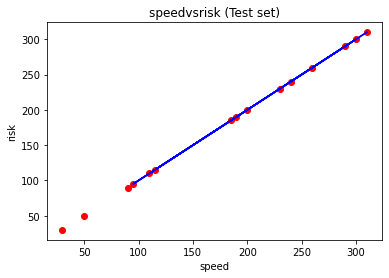

In [58]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')


# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('speedvsrisk (Test set)')
plt.xlabel('speed')
plt.ylabel('risk')
plt.show()